                                             medybuddy:data to insights

In [193]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway,pearsonr


In [194]:
df1= pd.read_excel('C:\\Users\\kajal\\Downloads\\Medibuddy insurance data personal details (1) (2).xlsx')
df2= pd.read_excel('C:\\Users\\kajal\\Downloads\\Medibuddy Insurance Data Price (1) (2).xlsx')
df = pd.merge(df1, df2, on='Policy no.', how='inner')  # Merging based on 'Policy no.'
df.head(20)


,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.4,1826.84300
1,PLC157033,1,no,southwest,19,male,24.6,1837.23700
2,PLC157060,0,no,southwest,56,male,40.3,10602.38500
3,PLC157087,1,no,southwest,30,female,32.4,4149.73600
4,PLC157186,5,no,southwest,19,female,28.6,4687.79700
5,PLC157231,0,no,southwest,26,male,20.8,2302.30000
6,PLC157303,0,no,southwest,55,male,37.3,20630.28351
7,PLC157483,0,no,southwest,19,female,28.9,1743.21400
8,PLC157492,2,no,southwest,61,female,39.1,14235.07200
9,PLC157546,3,no,southwest,53,female,28.1,11741.72600


In [195]:
df.shape

(1338, 8)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   children        1338 non-null   int64  
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   int64  
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [197]:
df.describe()

,children,age,bmi,charges in INR
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,1.094918,39.207025,30.663397,13270.422265
std,1.205493,14.049960,6.098187,12110.011237
min,0.000000,18.000000,15.960000,1121.873900
25%,0.000000,27.000000,26.296250,4740.287150
50%,1.000000,39.000000,30.400000,9382.033000
75%,2.000000,51.000000,34.693750,16639.912515
max,5.000000,64.000000,53.130000,63770.428010


In [198]:
df.isnull().sum()

Policy no.        0
children          0
smoker            0
region            0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64

1.	Does the gender of the person matter for the company as a constraint for extending policies? 

Unique values in 'sex' column: ['male' 'female']


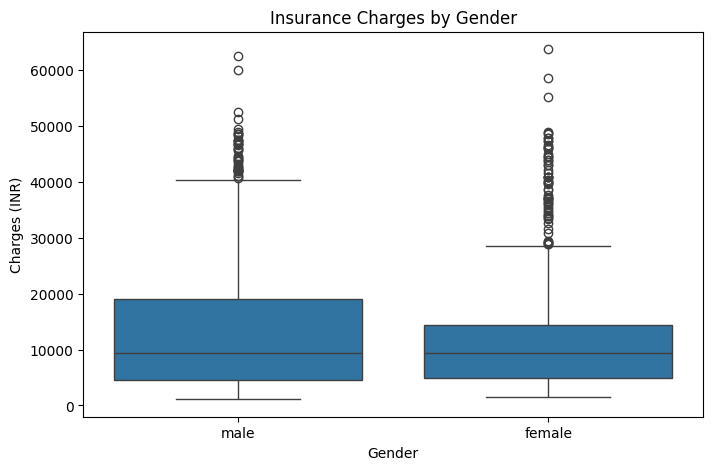


T-test Results:
T-statistic: 2.0975
P-value: 0.0361
There is a statistically significant difference in charges based on gender.
This suggests that gender may be considered by the company as a constraint when extending policies.


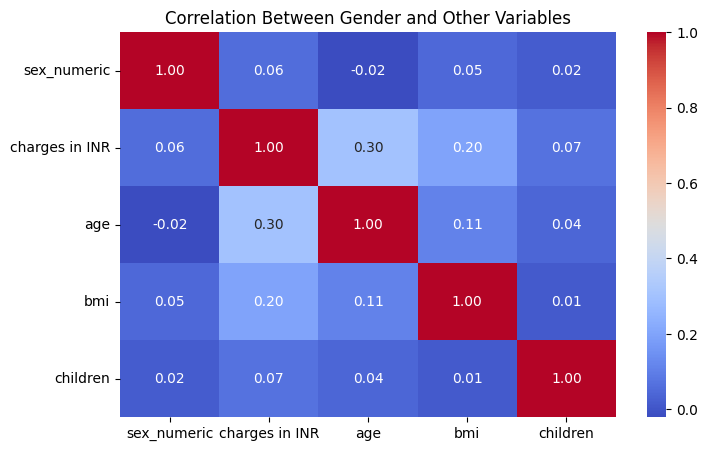

In [ ]:
# Checking the unique values in gender column
print("Unique values in 'sex' column:", df["sex"].unique())

# Visualizing charges by gender
plt.figure(figsize=(8,5))
sns.boxplot(x="sex", y="charges in INR", data=df)   
plt.title("Insurance Charges by Gender")
plt.xlabel("Gender")
plt.ylabel("Charges (INR)")
plt.show()

# Performing a t-test to check if there is a significant difference in charges
male_charges = df[df["sex"] == "male"]["charges in INR"]
female_charges = df[df["sex"] == "female"]["charges in INR"]

t_stat, p_value = ttest_ind(male_charges, female_charges)

print("\nT-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in charges based on gender.")
    print("This suggests that gender may be considered by the company as a constraint when extending policies.")
else:
    print("No significant difference found in charges based on gender.")
    print("Gender is likely not a constraint for policy extension.")

# Checking correlation of gender with other numeric variables
df["sex_numeric"] = df["sex"].map({"male": 1, "female": 0})  # Converting gender to numeric for correlation
plt.figure(figsize=(8,5))
sns.heatmap(df[["sex_numeric", "charges in INR", "age", "bmi", "children"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Gender and Other Variables")
plt.show()


after performing some test my analysis says that there is a significant difference in charges based on gender so yes gender may be considered by the company as a constraint when extending policies.

2.	What is the average amount of money the company spent over each policy cover? 

In [200]:
average_charges = df["charges in INR"].mean()

print(f"The average amount of money spent per policy cover is: {average_charges:.2f} INR")

The average amount of money spent per policy cover is: 13270.42 INR


3.	Could you advice if the company needs to offer separate policies based upon the geographic location of the person? 

Unique values in 'region' column: ['southwest' 'southeast' 'northwest' 'northeast']

Average Charges by Region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges in INR, dtype: float64


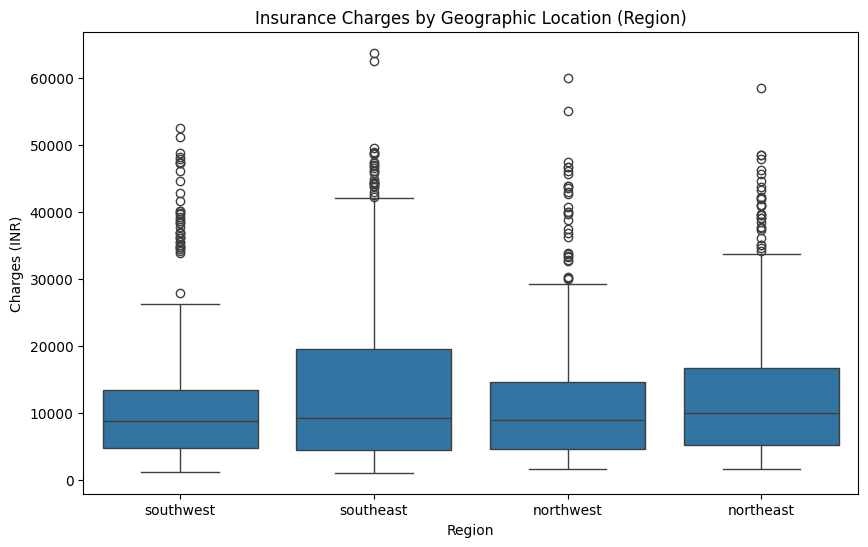


ANOVA Test Results:
F-statistic: 2.9696
P-value: 0.0309
There is a statistically significant difference in charges based on geographic location.
This suggests that the company may need to offer separate policies based on regions.


In [201]:
print("Unique values in 'region' column:", df["region"].unique())

# Grouping by region to find average charges
avg_charges_by_region = df.groupby("region")["charges in INR"].mean()
print("\nAverage Charges by Region:")
print(avg_charges_by_region)

# Visualizing charges by region
plt.figure(figsize=(10,6))
sns.boxplot(x="region", y="charges in INR", data=df)
plt.title("Insurance Charges by Geographic Location (Region)")
plt.xlabel("Region")
plt.ylabel("Charges (INR)")
plt.show()

# Performing ANOVA test to check statistical significance of regional differences
regions = df["region"].unique()
charges_by_region = [df[df["region"] == region]["charges in INR"] for region in regions]

f_stat, p_value = f_oneway(*charges_by_region)

print("\nANOVA Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in charges based on geographic location.")
    print("This suggests that the company may need to offer separate policies based on regions.")
else:
    print("No significant difference found in charges based on geographic location.")
    print("The company may not need separate policies based on region.")

Ans> yes i could suggest that company may needs to offer seprate polices based on reason because there is major difference in charges based on regions

4.	Does the no. of dependents make a difference in the amount claimed? 

Unique values in 'children' column: [0 1 5 2 3 4]

Average Charges by Number of Dependents:
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges in INR, dtype: float64


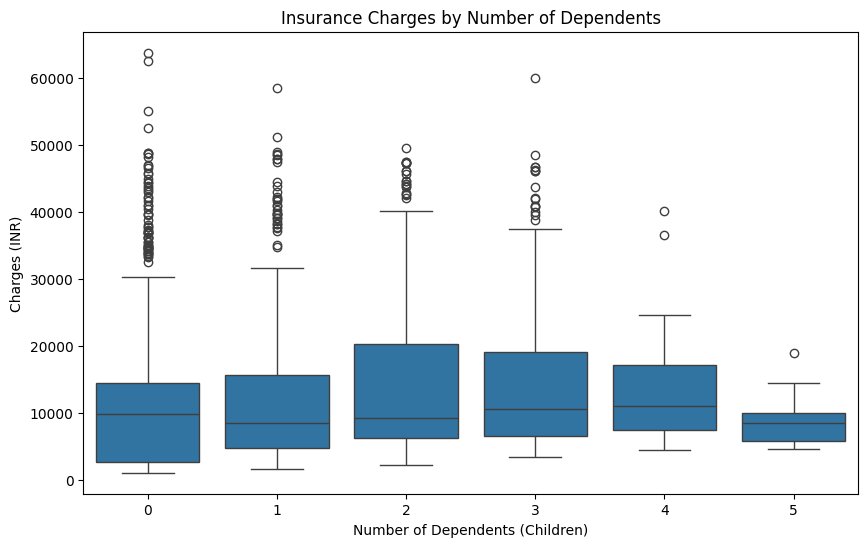


Correlation Test Results:
Correlation Coefficient: 0.0680
P-value: 0.0129

ANOVA Test Results:
F-statistic: 3.2969
P-value: 0.0058
There is a statistically significant correlation between the number of dependents and insurance charges.
ANOVA test suggests that different dependent counts significantly affect the amount claimed.
This means the number of dependents does make a difference in insurance claims.


In [202]:
print("Unique values in 'children' column:", df["children"].unique())

# Grouping by number of dependents to find average charges
avg_charges_by_dependents = df.groupby("children")["charges in INR"].mean()
print("\nAverage Charges by Number of Dependents:")
print(avg_charges_by_dependents)

# Visualizing charges by number of dependents
plt.figure(figsize=(10,6))
sns.boxplot(x="children", y="charges in INR", data=df)
plt.title("Insurance Charges by Number of Dependents")
plt.xlabel("Number of Dependents (Children)")
plt.ylabel("Charges (INR)")
plt.show()

# Checking correlation between number of dependents and charges
correlation, p_value_corr = pearsonr(df["children"], df["charges in INR"])
print("\nCorrelation Test Results:")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value_corr:.4f}")

# Performing ANOVA test to check statistical significance of different dependent groups
dependent_groups = [df[df["children"] == dep]["charges in INR"] for dep in df["children"].unique()]

f_stat, p_value_anova = f_oneway(*dependent_groups)

print("\nANOVA Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.4f}")

# Interpretation
if p_value_corr < 0.05:
    print("There is a statistically significant correlation between the number of dependents and insurance charges.")
else:
    print("No strong correlation found between dependents and insurance charges.")

if p_value_anova < 0.05:
    print("ANOVA test suggests that different dependent counts significantly affect the amount claimed.")
    print("This means the number of dependents does make a difference in insurance claims.")
else:
    print("No significant difference found in claimed amounts based on dependent count.")

Ans> yes number of dependends make a  differences in amount claimed.

5.	Does a study of persons BMI get the company any idea for the insurance claim that it would extend? 


BMI Statistics:
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


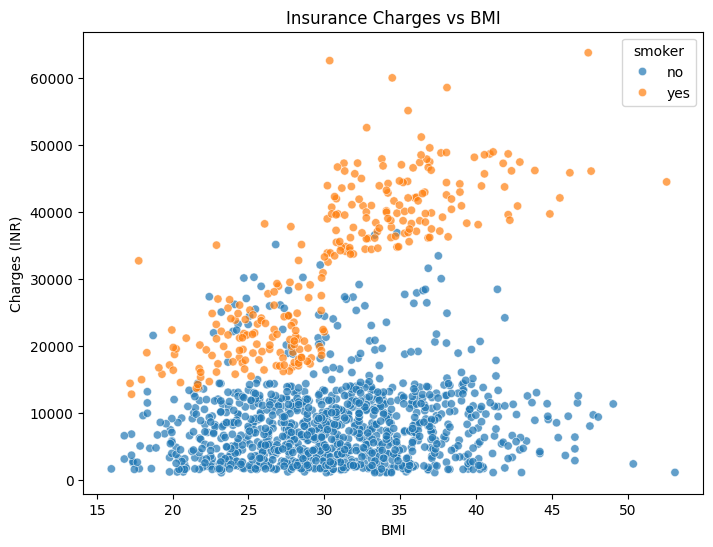


Correlation Test Results:
Correlation Coefficient: 0.1983
P-value: 0.0000

Linear Regression Results (Without Sklearn):
Intercept: 1192.9372
Slope (Effect of BMI on Charges): 393.8730


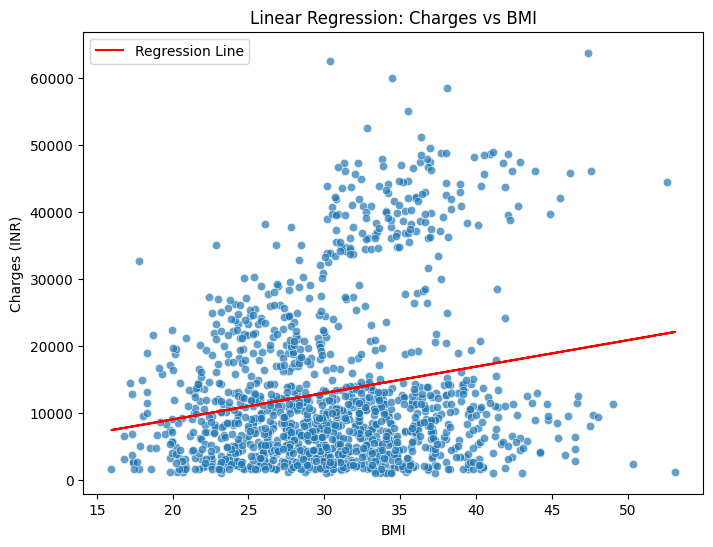

There is a statistically significant correlation between BMI and insurance charges.
This suggests that BMI is an important factor in determining policy claims.


In [203]:
# Checking basic BMI statistics
print("\nBMI Statistics:")
print(df["bmi"].describe())

# Visualizing charges vs BMI
plt.figure(figsize=(8,6))
sns.scatterplot(x="bmi", y="charges in INR", data=df, hue="smoker", alpha=0.7)
plt.title("Insurance Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges (INR)")
plt.show()

# Checking correlation between BMI and charges
correlation, p_value_corr = pearsonr(df["bmi"], df["charges in INR"])
print("\nCorrelation Test Results:")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value_corr:.4f}")

# Performing Linear Regression Manually Using NumPy
X = df["bmi"].values  # Independent variable
y = df["charges in INR"].values  # Dependent variable

# Computing slope and intercept using least squares method
X_mean = numpy.mean(X)
y_mean = numpy.mean(y)

numerator = numpy.sum((X - X_mean) * (y - y_mean))
denominator = numpy.sum((X - X_mean) ** 2)

slope = numerator / denominator
intercept = y_mean - (slope * X_mean)

print("\nLinear Regression Results (Without Sklearn):")
print(f"Intercept: {intercept:.4f}")
print(f"Slope (Effect of BMI on Charges): {slope:.4f}")

# Predict charges based on BMI
y_pred = intercept + slope * X

# Visualizing the regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["bmi"], y=df["charges in INR"], alpha=0.7)
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.title("Linear Regression: Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges (INR)")
plt.legend()
plt.show()

# Interpretation
if p_value_corr < 0.05:
    print("There is a statistically significant correlation between BMI and insurance charges.")
    print("This suggests that BMI is an important factor in determining policy claims.")
else:
    print("No strong correlation found between BMI and insurance charges.")
    print("BMI may not be a major deciding factor for insurance claim amounts.")

Ans > yes BMI is an importent factor and study of bmi will definitely get company an idea.

6.	Is it needed for the company to understand whether the person covered is a smoker or a non-smoker? 

Unique values in 'smoker' column: ['no' 'yes']

Average Charges by Smoker Status:
smoker
no      8434.268298
yes    32050.231832
Name: charges in INR, dtype: float64


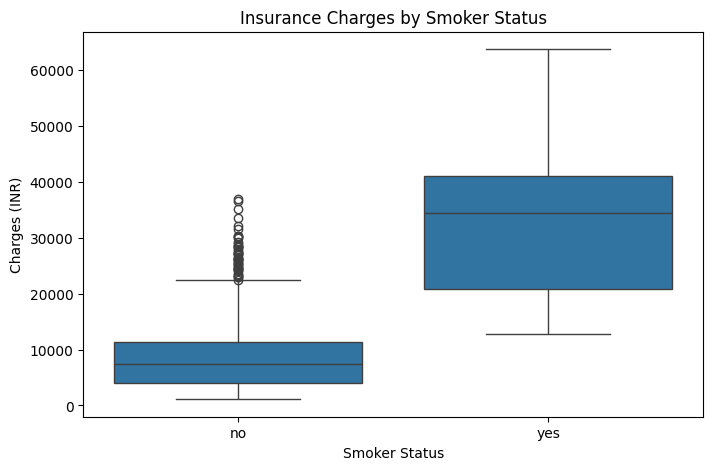


T-test Results:
T-statistic: 46.6649
P-value: 0.0000
There is a statistically significant difference in charges based on smoker status.
This suggests that the company should consider smoker status when extending policies.


In [204]:
# Checking unique values in smoker column
print("Unique values in 'smoker' column:", df["smoker"].unique())

# Grouping by smoker status to find average charges
avg_charges_by_smoker = df.groupby("smoker")["charges in INR"].mean()
print("\nAverage Charges by Smoker Status:")
print(avg_charges_by_smoker)

# Visualizing charges by smoker status
plt.figure(figsize=(8,5))
sns.boxplot(x="smoker", y="charges in INR", data=df)
plt.title("Insurance Charges by Smoker Status")
plt.xlabel("Smoker Status")
plt.ylabel("Charges (INR)")
plt.show()

# Performing a t-test to check if smoking significantly affects charges
smoker_charges = df[df["smoker"] == "yes"]["charges in INR"]
non_smoker_charges = df[df["smoker"] == "no"]["charges in INR"]

t_stat, p_value = ttest_ind(smoker_charges, non_smoker_charges)

print("\nT-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in charges based on smoker status.")
    print("This suggests that the company should consider smoker status when extending policies.")
else:
    print("No significant difference found in charges based on smoker status.")
    print("Smoker status may not be a major factor for policy extension.")

Ans > yes company should consider smoking status when extending polices.

7.	Does age have any barrier on the insurance claimed? 


Age Statistics:
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


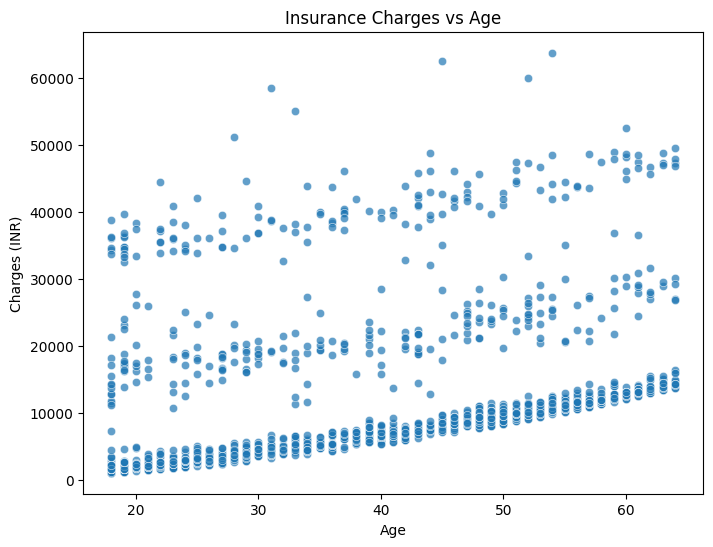


Correlation Test Results:
Correlation Coefficient: 0.2990
P-value: 0.0000

Linear Regression Results (Without Sklearn):
Intercept: 3165.8850
Slope (Effect of Age on Charges): 257.7226


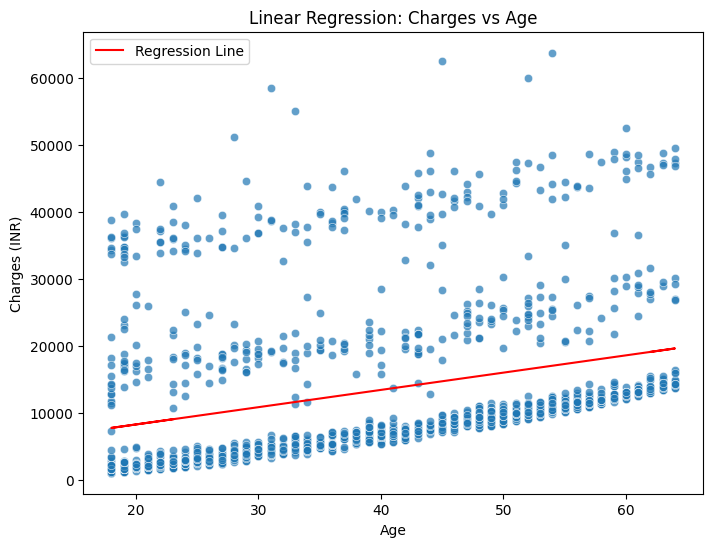

There is a statistically significant correlation between age and insurance charges.
This suggests that age is an important factor in determining policy claims.


In [205]:
print("\nAge Statistics:")
print(df["age"].describe())

# Visualizing charges vs age
plt.figure(figsize=(8,6))
sns.scatterplot(x="age", y="charges in INR", data=df, alpha=0.7)
plt.title("Insurance Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges (INR)")
plt.show()

# Checking correlation between age and charges
correlation, p_value_corr = pearsonr(df["age"], df["charges in INR"])
print("\nCorrelation Test Results:")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value_corr:.4f}")

# Performing Linear Regression Manually Using NumPy
X = df["age"].values  # Independent variable
y = df["charges in INR"].values  # Dependent variable

# Computing slope and intercept using least squares method
X_mean = numpy.mean(X)
y_mean = numpy.mean(y)

numerator = numpy.sum((X - X_mean) * (y - y_mean))
denominator = numpy.sum((X - X_mean) ** 2)

slope = numerator / denominator
intercept = y_mean - (slope * X_mean)

print("\nLinear Regression Results (Without Sklearn):")
print(f"Intercept: {intercept:.4f}")
print(f"Slope (Effect of Age on Charges): {slope:.4f}")

# Predict charges based on age
y_pred = intercept + slope * X

# Visualizing the regression line
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["age"], y=df["charges in INR"], alpha=0.7)
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.title("Linear Regression: Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges (INR)")
plt.legend()
plt.show()

# Interpretation
if p_value_corr < 0.05:
    print("There is a statistically significant correlation between age and insurance charges.")
    print("This suggests that age is an important factor in determining policy claims.")
else:
    print("No strong correlation found between age and insurance charges.")
    print("Age may not be a major deciding factor for insurance claim amounts.")

8.	Can the company extend certain discounts after checking the health status (BMI) in this case? 


BMI Statistics:
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


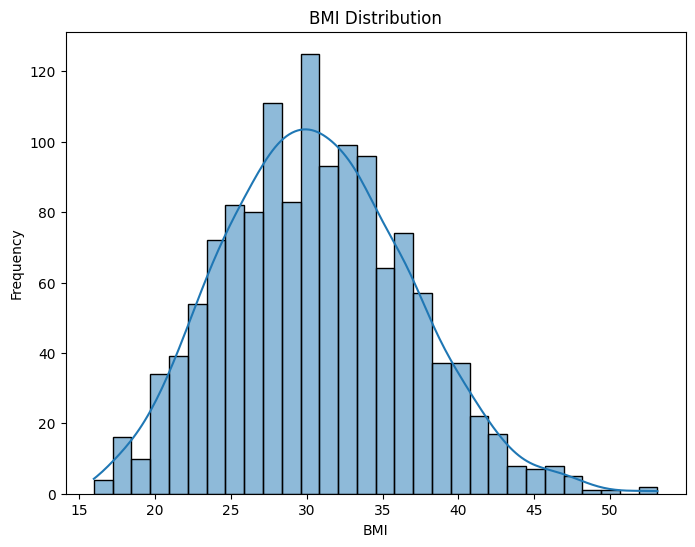


Correlation Test Results:
Correlation Coefficient: 0.1983
P-value: 0.0000

Linear Regression Results (Without Sklearn):
Intercept: 1192.9372
Slope (Effect of BMI on Charges): 393.8730

Average Charges Based on BMI Discount Eligibility:
discount_eligible
No     13940.237872
Yes    10282.224474
Name: charges in INR, dtype: float64


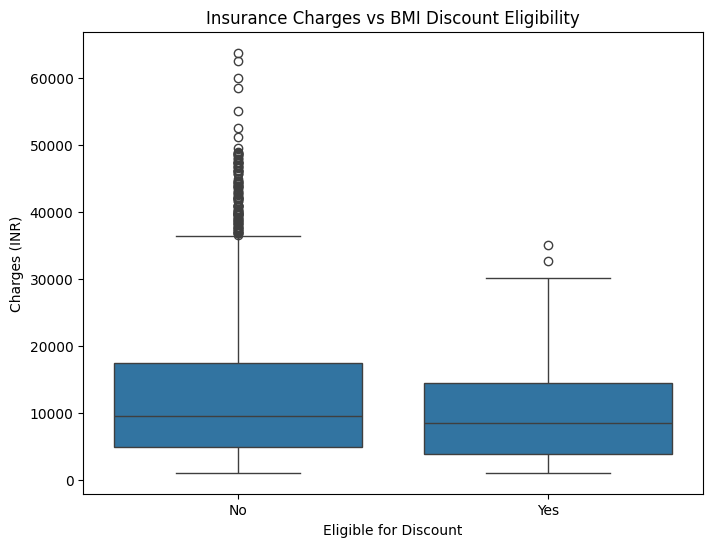

There is a statistically significant correlation between BMI and insurance charges.
This suggests that lower BMI is linked to lower charges, meaning discounts can be offered.


In [206]:
print("\nBMI Statistics:")
print(df["bmi"].describe())

# Visualizing BMI distribution
plt.figure(figsize=(8,6))
sns.histplot(df["bmi"], bins=30, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

# Checking correlation between BMI and insurance charges
correlation, p_value_corr = pearsonr(df["bmi"], df["charges in INR"])
print("\nCorrelation Test Results:")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value_corr:.4f}")

# Performing Linear Regression Manually Using NumPy
X = df["bmi"].values  # Independent variable
y = df["charges in INR"].values  # Dependent variable

# Computing slope and intercept using least squares method
X_mean = numpy.mean(X)
y_mean = numpy.mean(y)

numerator = numpy.sum((X - X_mean) * (y - y_mean))
denominator = numpy.sum((X - X_mean) ** 2)

slope = numerator / denominator
intercept = y_mean - (slope * X_mean)

print("\nLinear Regression Results (Without Sklearn):")
print(f"Intercept: {intercept:.4f}")
print(f"Slope (Effect of BMI on Charges): {slope:.4f}")

# Simulating a discount policy: If BMI < 25 (healthy range), apply a discount
df["discount_eligible"] = numpy.where(df["bmi"] < 25, "Yes", "No")

# Checking average charges for those eligible vs. not eligible for discount
avg_charges_discount = df.groupby("discount_eligible")["charges in INR"].mean()
print("\nAverage Charges Based on BMI Discount Eligibility:")
print(avg_charges_discount)

# Visualization: Charges vs BMI with discount eligibility
plt.figure(figsize=(8,6))
sns.boxplot(x="discount_eligible", y="charges in INR", data=df)
plt.title("Insurance Charges vs BMI Discount Eligibility")
plt.xlabel("Eligible for Discount")
plt.ylabel("Charges (INR)")
plt.show()

# Interpretation
if p_value_corr < 0.05:
    print("There is a statistically significant correlation between BMI and insurance charges.")
    print("This suggests that lower BMI is linked to lower charges, meaning discounts can be offered.")
else:
    print("No strong correlation found between BMI and insurance charges.")
    print("BMI alone may not be enough to decide discount eligibility.")